In [10]:
import skvideo.io as skv

import matplotlib.pyplot as plt
%matplotlib inline

import os

from skimage.measure import block_reduce

import numpy as np

In [2]:
def avi_to_nparray(dir, hw=[0, 0]):
    X = list()
    
    for fname in filter(lambda x: x.split(".")[-1] == "avi", os.listdir(dir)):
        print dir+fname
        X.append(skv.vread(dir + fname))
    
    return X

In [47]:
def load_reduce_pipeline(path):
    vid = skv.vread(path)
    vid = block_reduce(vid, (1, 5, 5, 1), func=np.max)
    vid = vid[:, :, 100:324, :]
    
    return np.pad(vid, ((0, 0), (4, 4), (0, 0), (0, 0)), "constant", constant_values=(0))

In [50]:
vid = load_reduce_pipeline("data/train/videos/akn.002.135.left.avi")

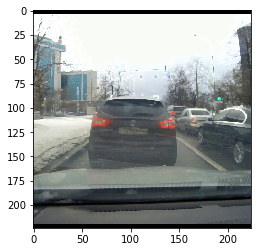

In [53]:
plt.imshow(vid[200])